<a href="https://colab.research.google.com/github/warrenshiv/CalCOFI_Data_Analysis/blob/main/Ass_Part2_Task4_Multiple_Regression_FirstNameLastName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Name:
# Last Name:

# Import Libraries  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import Data

In [2]:
df = pd.read_csv(r'/content/bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f' % x)

# Data management

In [3]:
# Select the variables and drop rows with missing values
variables = ['T_degC', 'Salnty', 'O2ml_L', 'PO4uM']
df = df.dropna(subset=variables)

In [4]:
# Define response variable and explanatory variables
Y = df['T_degC']
X1 = df[['Salnty', 'O2ml_L', 'PO4uM']]
X2 = df[['Salnty', 'O2ml_L']]
X3 = df[['Salnty', 'PO4uM']]
X4 = df[['O2ml_L', 'PO4uM']]

# Correlation between each explantory variable and response variable

In [5]:
corr_matrix = df[variables].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
           T_degC    Salnty    O2ml_L     PO4uM
T_degC  1.000000 -0.447441  0.788541 -0.889792
Salnty -0.447441  1.000000 -0.771783  0.695084
O2ml_L  0.788541 -0.771783  1.000000 -0.951955
PO4uM  -0.889792  0.695084 -0.951955  1.000000


# Scatter plot between each explantory variable and response variable

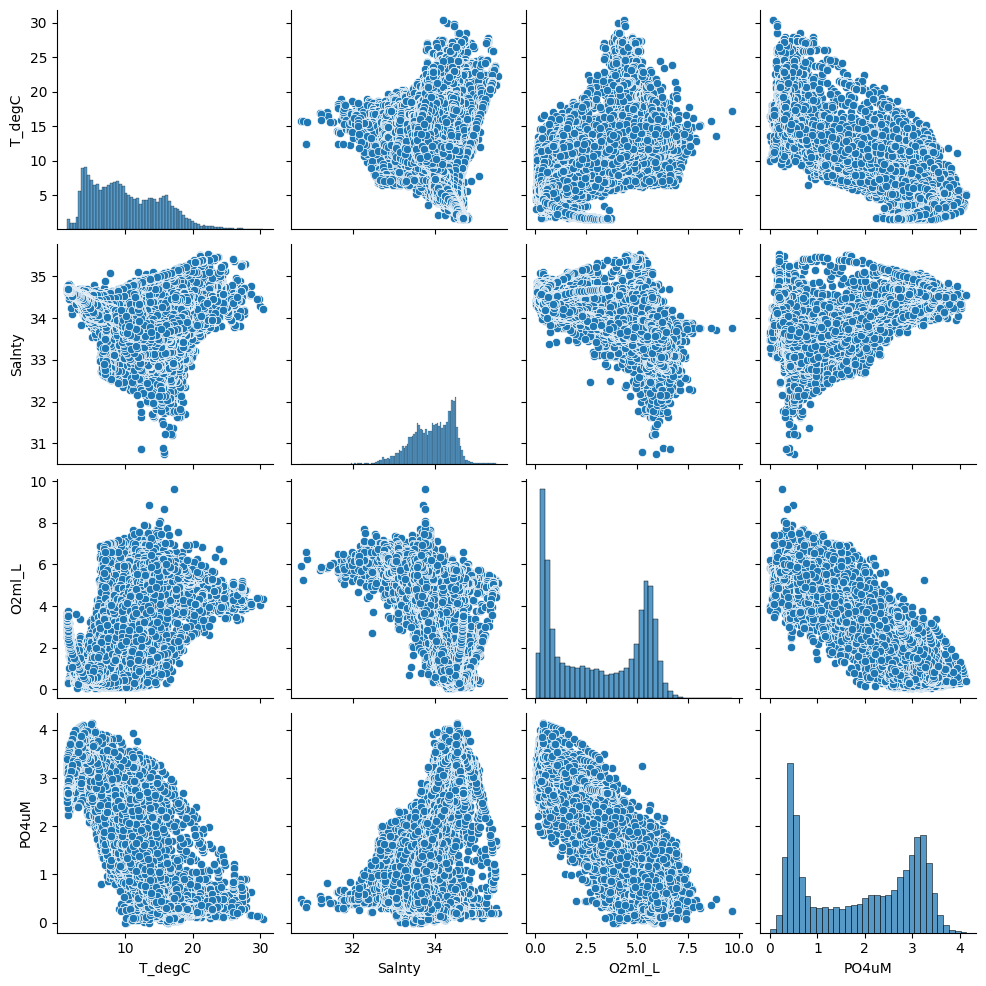

In [6]:
sns.pairplot(df[variables])
plt.show()

# Regression Analysis for each candidate

In [7]:
def multiple_regression(X, Y):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(Y, X).fit()
    print(model.summary())
    return model

In [8]:
# Perform multiple regression for each combination
print("Model 1: T_degC ~ Salnty + O2ml_L + PO4uM")
model1 = multiple_regression(X1, Y)

Model 1: T_degC ~ Salnty + O2ml_L + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.135e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:32   Log-Likelihood:            -1.1991e+05
No. Observations:               57635   AIC:                         2.398e+05
Df Residuals:                   57631   BIC:                         2.399e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [9]:
print("\nModel 2: T_degC ~ Salnty + O2ml_L")
model2 = multiple_regression(X2, Y)


Model 2: T_degC ~ Salnty + O2ml_L
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 6.296e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:32   Log-Likelihood:            -1.4222e+05
No. Observations:               57635   AIC:                         2.844e+05
Df Residuals:                   57632   BIC:                         2.845e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -133.

In [10]:
print("\nModel 3: T_degC ~ Salnty + PO4uM")
model3 = multiple_regression(X3, Y)


Model 3: T_degC ~ Salnty + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.612e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:32   Log-Likelihood:            -1.2125e+05
No. Observations:               57635   AIC:                         2.425e+05
Df Residuals:                   57632   BIC:                         2.425e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -93.4

In [11]:
print("\nModel 4: T_degC ~ O2ml_L + PO4uM")
model4 = multiple_regression(X4, Y)


Model 4: T_degC ~ O2ml_L + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 1.389e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:32   Log-Likelihood:            -1.2484e+05
No. Observations:               57635   AIC:                         2.497e+05
Df Residuals:                   57632   BIC:                         2.497e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9

In [12]:
# Select the best model based on Adjusted R-squared and other statistics
best_model = model1

# Q-Q plot for each candidate

In [13]:
def qq_plot(model, title):
    residuals = model.resid
    fig = sm.qqplot(residuals, line ='45')
    plt.title(title)
    plt.show()


Q-Q plot for Model 1


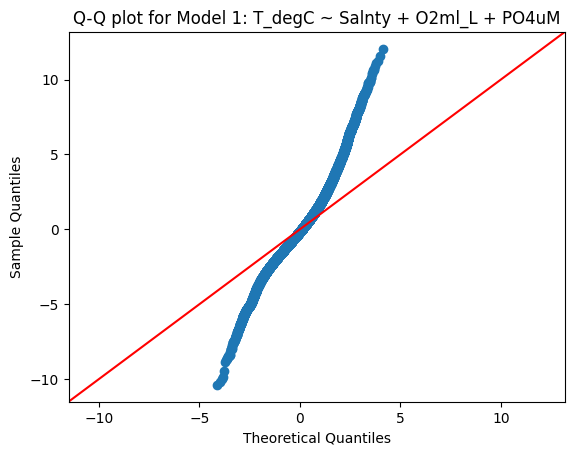

In [14]:
print("\nQ-Q plot for Model 1")
qq_plot(model1, "Q-Q plot for Model 1: T_degC ~ Salnty + O2ml_L + PO4uM")


Q-Q plot for Model 2


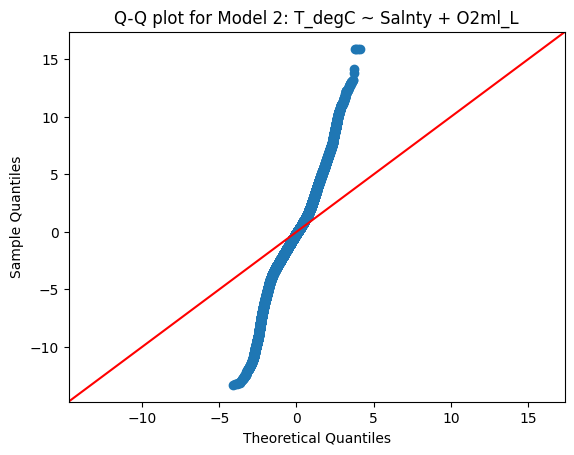

In [15]:
print("\nQ-Q plot for Model 2")
qq_plot(model2, "Q-Q plot for Model 2: T_degC ~ Salnty + O2ml_L")


Q-Q plot for Model 3


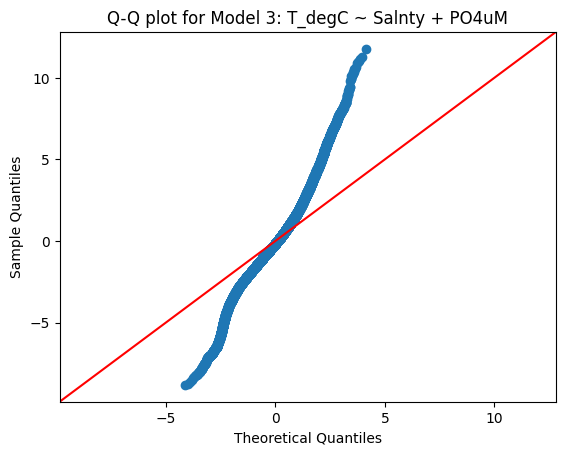

In [16]:
print("\nQ-Q plot for Model 3")
qq_plot(model3, "Q-Q plot for Model 3: T_degC ~ Salnty + PO4uM")


Q-Q plot for Model 4


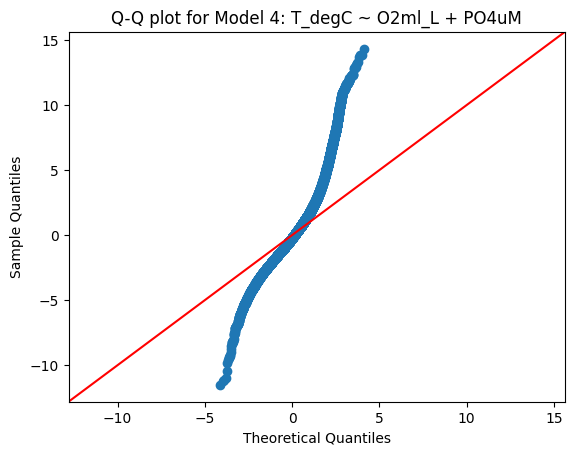

In [17]:
print("\nQ-Q plot for Model 4")
qq_plot(model4, "Q-Q plot for Model 4: T_degC ~ O2ml_L + PO4uM")

# standardized residual plots

In [18]:
def standardized_residual_plot(model, title):
    residuals = model.get_influence().resid_studentized_internal
    fitted = model.fittedvalues
    plt.scatter(fitted, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Standardized Residuals')
    plt.title(title)
    plt.show()


Standardized Residual Plot for Model 1


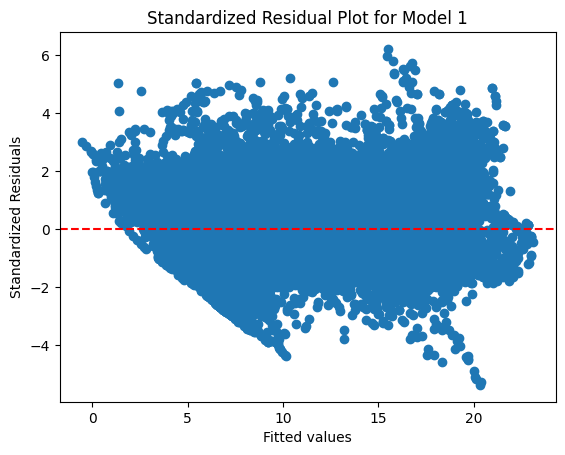

In [19]:
print("\nStandardized Residual Plot for Model 1")
standardized_residual_plot(model1, "Standardized Residual Plot for Model 1")


Standardized Residual Plot for Model 2


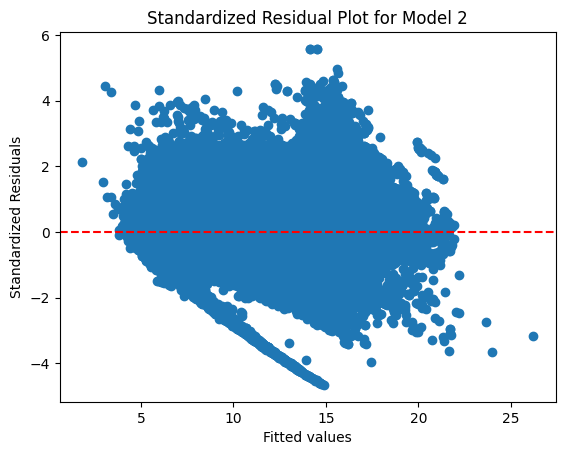

In [20]:

print("\nStandardized Residual Plot for Model 2")
standardized_residual_plot(model2, "Standardized Residual Plot for Model 2")


Standardized Residual Plot for Model 3


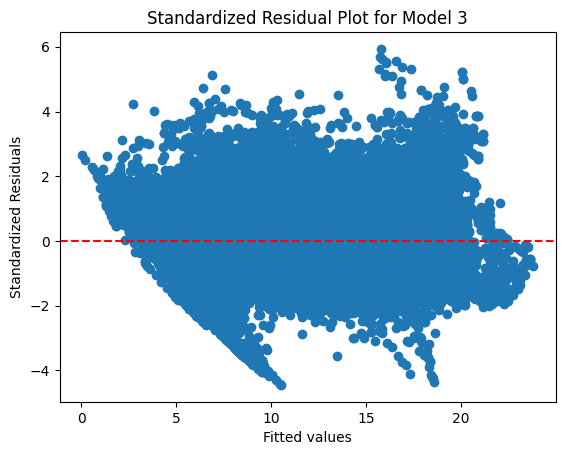

In [21]:
print("\nStandardized Residual Plot for Model 3")
standardized_residual_plot(model3, "Standardized Residual Plot for Model 3")


Standardized Residual Plot for Model 4


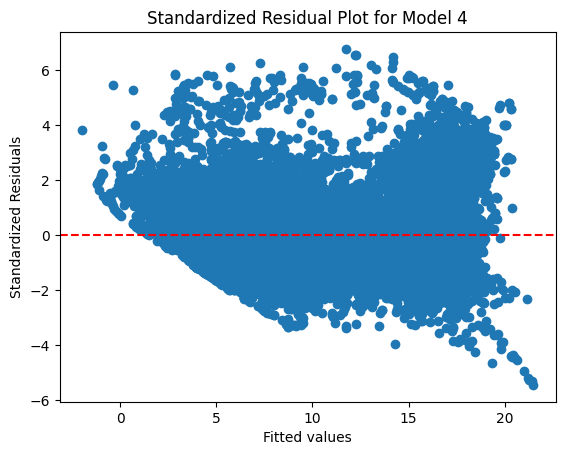

In [22]:
print("\nStandardized Residual Plot for Model 4")
standardized_residual_plot(model4, "Standardized Residual Plot for Model 4")